In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [4]:
np.random.seed(0)
data = np.sin(np.linspace(0, 20, 100)) * 10 + 25 + np.random.normal(0, 1, 100)

df = pd.DataFrame(data, columns=['Temperature'])

df.head()

,Temperature
0,26.764052
1,27.406646
2,29.910104
3,32.937234
4,34.097184


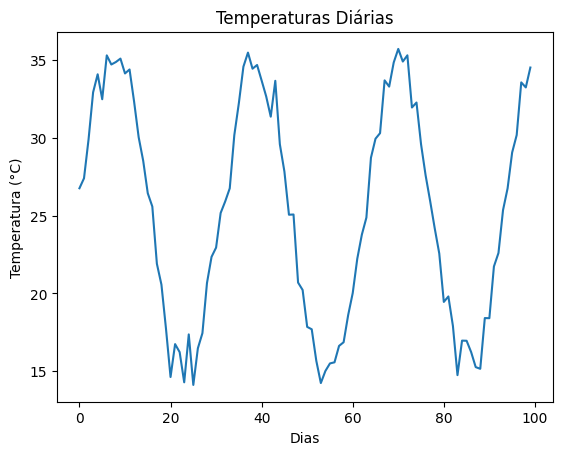

In [5]:
plt.plot(df)
plt.title('Temperaturas Diárias')
plt.xlabel('Dias')
plt.ylabel('Temperatura (°C)')

plt.show()

In [9]:
scaled_data = MinMaxScaler().fit_transform(df) # Normalizar os dados com a função MinMaxScaler
df['Temperature'] = scaled_data # Substituir os dados normalizados na coluna 'temperature' do dataframe 

def criar_sequencia(data, window_size=30):# cria uma função para criar sequêcias de dados 
    X, y = [], [] # criar duas listas vazias x e y
    for i in range(len(data) - window_size): # for no intervalo de comprimento dos dados (len()) menos o tamanho da janela de entrada 
        X.append(data[i:i + window_size]) # adicionar a sequência de dados de i até i + window_size na lista X
        y.append(data[i + window_size]) # adicionar o dado na posição i + window_size na lista y 
    X, y = np.array(X), np.array(y) # transformar as lista x e y em arrays 
    return X, y # retorna x e y
X, y = criar_sequencia(scaled_data, window_size=30)# chamar a função criar_sequencia com os dados normalizados e o tamanho da janela de entrada 30 dias 
X = X.reshape((X.shape[0], X.shape[1], df.shape[1])) # redimensionar o array X 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)# dividir os dados em treino e teste 
model = Sequential([LSTM(128, input_shape=(30, 1)) # criar um modelo sequencial com uma camada LSTM com 128 neurônios e tamanho da entrada 30 dias 
                    , Dense(1)])# adicionar uma camada densa com 1 neurônio 

model.compile(optimizer='rmsprop', loss='mse') # compilar o modelo com o otimizador rmsprop e a função de perda mse 
model.fit(X_train, y_train, epochs=30, batch_size=32) # treinar o modelo com os dados de treino 
model.summary() # mostra um resumo do sumario do modelo 
y_pred = model.predict(X_train) # faz previsões com os dados de treino 



Epoch 1/30


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.3467 
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1405
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1288
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1137
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1143
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0863
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0819
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0744
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0899
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0643
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0650
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0514
Epoch 13/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0382
Epoch 14/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0304
Epoch 15/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0141
Epoch 16/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,380 (521.02 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 66,691 (260.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


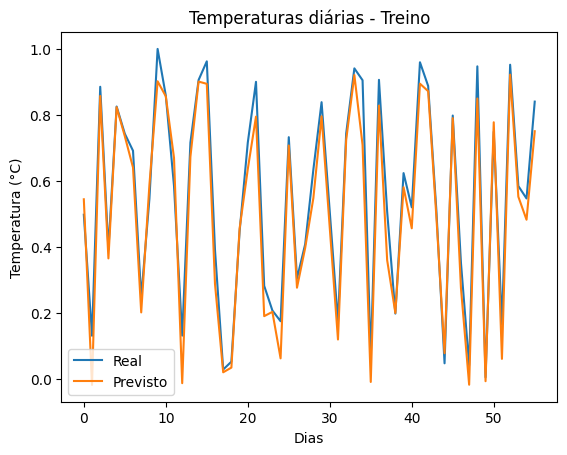

In [10]:
plt.plot(y_train, label = 'Real')
plt.plot(y_pred, label = 'Previsto')
plt.title('Temperaturas diárias - Treino')
plt.xlabel('Dias')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()